<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Project 1: Employee Attribution 

## Employee Attrition Data: 

The IBM HR Attrition Case Study is a fictional dataset which aims to identify important factors that might be influencial in determining which employee might leave the film and who may not. 

### What is Employee Attrition?

Employee attrition is a gradual but deliberate reduction in the number of employees in a company or business organization. Employees will at some point in time look to change their job places for a number of reasons.(we will be looking at those reasons later using the Exploratary Data Analysis (EDA) method.)

### Why is Employee Attrition matters?
Having a clear view of employee attrition rate helps to identify the problems and come up with solutions to retain employees from leaving. 

#### Formula: 

[ Rate of attrition = (number of employees that left the company / the average number of employees) x 100% ]

A high attrition rate indicates that your employees are leaving frequently, while a low rate shows that you’re keeping your employees for longer periods of time.



#### In this lab, we'll explore this dataset to find the reasons that contributes to the attrition.

- Which JobLevel has the highest Employee Attrition?
- Does YearsInCurrentRole affect the Employee Attrition? 
- Does higher MonthlyIncome helps to reduce Employee Attrition? 
- Which Age group has the highest Employee Attrition? 

Original Data: [Employee Attrition Dataset](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

Data Dictionary: [Variables](https://docs.google.com/document/d/13ZmQYOlnJyUBWpX8-Nge-KJ8XcqS7N3crFx9-Oz1hk0/edit)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy import stats

# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


## Taking a glance at the data

In [2]:
#Reading the file
#First 5 rows of data
data = pd.read_csv("Employee-Attrition.csv.xls")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#Dimension of data: 1470 Observations with 35 Variables. 
data.shape

(1470, 35)

In [4]:
#Understand the Variables 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [6]:
#Extracting the uniq_data for each Variables
#focus on what factors might has the high weightage in affecting the employee attrition. 

for uniq_data in data:
    print(uniq_data)
    values, counts = np.unique(data[uniq_data], return_counts=True)
    print(values)
    print(counts)
    
for uniq_data in data.columns:
    print(uniq_data)
    data[uniq_data].unique()
    print(np.sort(data[uniq_data].unique()))

Age
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60]
[ 8  9 11 13 16 14 26 26 39 48 48 68 60 69 61 58 77 78 69 50 58 42 57 40
 46 32 33 41 33 24 19 24 30 19 18 19 18 22 14  4 14 10  5]
Attrition
['No' 'Yes']
[1233  237]
BusinessTravel
['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
[ 150  277 1043]
DailyRate
[ 102  103  104  105  106  107  109  111  115  116  117  118  119  120
  121  124  125  128  129  130  131  132  134  135  136  138  140  141
  142  143  144  145  146  147  148  150  152  153  154  155  156  157
  160  161  163  164  167  168  170  172  174  176  177  179  180  181
  182  185  188  189  192  193  194  195  196  199  200  201  202  203
  204  205  206  207  208  210  211  213  216  217  218  219  224  228
  230  231  232  234  237  238  240  241  243  244  247  248  249  251
  252  253  254  256  258  261  263  264  265  266  267  268  269  271
  277  279  280  282  285  286  287 

In [7]:
#Check on 35 Variables
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Columns considering to drop after checking the uniq_data in each column, as they are does not contribute much insights to our findings. 

DROP1.[EmployeeCount]: Reason: Numbers are the same. Value is 1 for all Employee surveyed. 

DROP2.[EmployeeNumber]: Reason: It's indicating Employee Number for each employee.

DROP3.[Gender]: Reason: Doesn't matter if is male or female. Gender doesn't effect the attrition rate.  

DROP4.[JobRole]: Reason: Will be focusing at JobLevel. To find out - is it higher the level, less likely to leave. 

DROP5.[NumCompaniesWorked]: Reason: Focus on why leaving the curr company, least prioty. 

DROP6.[Over 18]: Describes if an employee is over 18 years of age. All cases are yes. 

DROP7.[PerformanceRating]: Reason: There are either 3/4 in the rating, does not contribute much insights.

DROP8.[StandardHours]: Reason: Numbers are the same. Constant Number at 80 (Hours) for each Employee.

DROP9.[StockOptionLevel]: Reason: We will be focusing on the JobLevel. 

DROP10.[TotalWorkingYears]: Reason: Focus on why leaving the current company. (Can associate with [Age]) 

DROP11.[TrainingTimesLastYear]: Reason: Least priority. 1-6hours of training time in a year is acceptable.

DROP12.[YearsWithCurrManager]: Reason: We will focus looking at [YearsInCurrentRole].

In [8]:
#Drop all the columns listed above. Reasons defined. 
col_drop = ['EmployeeCount','EmployeeNumber','Gender', 'JobRole','NumCompaniesWorked',
            'Over18','PerformanceRating','StandardHours','StockOptionLevel','TotalWorkingYears',
            'TrainingTimesLastYear','YearsWithCurrManager']
data.drop(col_drop, inplace=True, axis=1)

In [9]:
#23 Columns left
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion'],
      dtype='object')

In [10]:
#check the new Dimension of data: 1470 Observations with 23 Variables. 
data.shape

(1470, 23)

In [11]:
#First 5 rows of data is show after dropping the uncessary columns. 
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,...,MaritalStatus,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,94,...,Single,5993,19479,Yes,11,1,1,6,4,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,61,...,Married,5130,24907,No,23,4,3,10,7,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,92,...,Single,2090,2396,Yes,15,2,3,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,56,...,Married,2909,23159,Yes,11,3,3,8,7,3
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,40,...,Married,3468,16632,No,12,4,3,2,2,2


In [12]:
#Explore the data types of each column
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
OverTime                    object
PercentSalaryHike            int64
RelationshipSatisfaction     int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
dtype: object

In [13]:
#Checking Null Value in the Data, there are no missing values 
#There is no missing values, so we do not have to encounter any missing data. 
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
dtype: int64

# 1. Exploring data sets

### *Attrition is the main 'business problem' we are looking at

In [14]:
#Yes = Left the company | 237 of 1470 Employee left
#No = Stayed | 1233 of 1470 Employee stayed

data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

([<matplotlib.patches.Wedge at 0x7fccfb6b0cd0>,
 [Text(-1.136781068348268, 0.6306574368426736, 'No'),
  Text(0.961891673217765, -0.5336332157899547, 'Yes')])

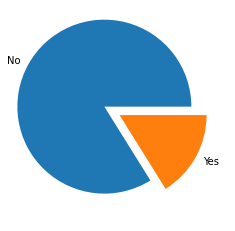

In [15]:
#For clearer visualisation
count = pd.DataFrame(data['Attrition'].value_counts())
plt.pie(count['Attrition'], labels = ['No','Yes'], explode = (0.2,0))

In [16]:
#Yes = 1
#No = 0
data['is_attrited'] = data['Attrition'].apply(lambda x: 1 if x =='Yes' else 0)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,...,MonthlyIncome,MonthlyRate,OverTime,PercentSalaryHike,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,is_attrited
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,94,...,5993,19479,Yes,11,1,1,6,4,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,61,...,5130,24907,No,23,4,3,10,7,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,92,...,2090,2396,Yes,15,2,3,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,56,...,2909,23159,Yes,11,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,40,...,3468,16632,No,12,4,3,2,2,2,0


In [17]:
#Get a rough idea what is most related to the attrition (which has already renamed as is_attrited). 
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,PercentSalaryHike,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,is_attrited
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.003634,0.053535,-0.021490,0.311309,0.212901,0.216513,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.022704,0.007846,-0.037848,-0.034055,0.009932,-0.033229,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,0.040235,0.006557,-0.026556,0.009508,0.018845,0.010029,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,-0.011111,-0.009118,0.009819,0.069114,0.060236,0.054254,-0.031373
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,-0.031701,0.007665,0.027627,0.001458,0.018007,0.016194,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,-0.009062,0.001330,-0.004607,-0.019582,-0.024106,-0.026716,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,-0.017205,0.034297,-0.014617,-0.021355,0.008717,-0.024184,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,-0.034730,0.021642,0.037818,0.534739,0.389447,0.353885,-0.169105
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,0.020002,-0.012454,-0.019459,-0.003803,-0.002305,-0.018214,-0.103481
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,-0.027269,0.025873,0.030683,0.514285,0.363818,0.344978,-0.159840


## After looking at the basic statistics, we will be focusing on the following data-points that is most related with 'is_attrited', before we explore some other insights.


In [18]:
#Correlation of the following variables with is_attrited

# JobLevel             | -0.169105

# YearsAtCurrentRole   | -0.160545

# MonthlyIncome        | -0.159840

# Age                  | -0.159205


### 1.1 How does Employee's JobLevel effecting the Employee Attrition? 

In [19]:
#1=lowest job level, 5= highest job level
np.sort(data['JobLevel'].unique())

array([1, 2, 3, 4, 5])

Attrition,No,Yes
JobLevel,,
1,73.664825,26.335175
2,90.262172,9.737828
3,85.321101,14.678899
4,95.283019,4.716981
5,92.753623,7.246377


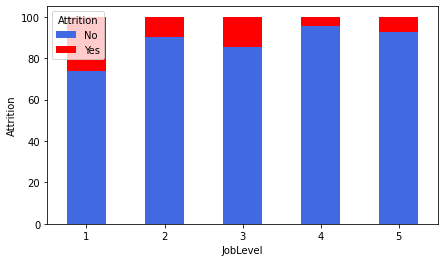

In [20]:
#Draw a barchart to show the 'is_attrited' rate. % of people staying and leaving under each Joblevel range. 
pal = ["royalblue", "red"]
ax= pd.crosstab(data['JobLevel'], data['Attrition']).apply(lambda r: r/r.sum()*100, axis=1)
ax.plot.bar(figsize=(7,4),stacked=True, rot=0,color=pal)
display(ax)

plt.xlabel('JobLevel')
plt.ylabel('Attrition')
plt.show()


#### Conclution: 
Lowest JobLevel = 1 has the highest attrition rate of 24.66%. When Job level increased, Attrition rate decreased, as low as 4.72%.

### 1.2 How does YearsInCurrentRole affecting the Employee Attrition? 

In [21]:
#Find the unique data in the YearsInCurrentRole columns. 0-18 years working at the same role. 
years = data['YearsInCurrentRole'].unique()
np.sort(years)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [22]:
#Catergorise the years into ranges for clearer visibility. 
def YearsWorking(x):
    if x <= 5 :
        Year_Class = 1
    elif x > 5 and x <= 10:
        Year_Class = 2
    elif x > 10 and x <=15:
        Year_Class = 3
    else:
        Year_Class = 4
    return Year_Class
data['Years_Working'] = data['YearsInCurrentRole'].apply(YearsWorking)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,...,MonthlyRate,OverTime,PercentSalaryHike,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,is_attrited,Years_Working
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,94,...,19479,Yes,11,1,1,6,4,0,1,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,61,...,24907,No,23,4,3,10,7,1,0,2
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,92,...,2396,Yes,15,2,3,0,0,0,1,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,56,...,23159,Yes,11,3,3,8,7,3,0,2
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,40,...,16632,No,12,4,3,2,2,2,0,1


In [23]:
#A glance of "yes" & 'no' attrition count related to Years_working
Years = pd.crosstab(data['Years_Working'], data['Attrition'])
Years["Years_Working"] = ['<=5','6-10','11-15','>15']
Years


Attrition,No,Yes,Years_Working
Years_Working,,,
1,764,184,<=5
2,396,48,6-10
3,60,5,11-15
4,13,0,>15


Attrition,No,Yes,Range
Years_Working,,,
1,80.590717,19.409283,<=5
2,89.189189,10.810811,6-10
3,92.307692,7.692308,11-15
4,100.000000,0.000000,>15


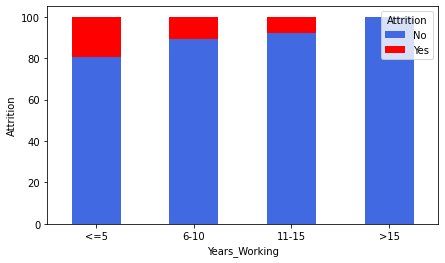

In [24]:
#visualise the data
pal = ["royalblue", "red"]
ax= pd.crosstab(data['Years_Working'], data['Attrition']).apply(lambda r: r/r.sum()*100, axis=1)
ax["Range"] = ['<=5','6-10','11-15','>15']
ax.plot.bar(figsize=(7,4),stacked=True, rot=0,color=pal)
display(ax)

plt.xlabel('Years_Working')
plt.ylabel('Attrition')
plt.xticks(ticks = np.arange(4), labels = ['<=5','6-10','11-15','>15'])
plt.show()

#### Conclusion:
Longer the years working the same role, less likely for the employee to leave the organisation. (0%)

Shorter the years working the same role, high chance the employee will leave the company. (19.4%)

### 1.3 How does MonthlyIncome effecting the Employee Attrition? 

In [25]:
#Take a glance at the Max and Min value for MonthlyIncome of the Employee.
data.MonthlyIncome.describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [26]:
#Group the incomes into different catergories.
def create_Income_class(x):
    if x < 5000:
        Income_class = 1
    elif x >= 5000 and x < 10000:
        Income_class = 2
    elif x >= 10000 and x < 15000:
        Income_class = 3
    else:
        Income_class = 4
    return Income_class

In [27]:
#Take a look at the first 5 rows of the data. New column 'IncomeRange' is created based on MonthlyIncome column. 
data['IncomeRange'] = data['MonthlyIncome'].apply(create_Income_class)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,is_attrited,Years_Working,IncomeRange
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,94,...,Yes,11,1,1,6,4,0,1,1,2
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,61,...,No,23,4,3,10,7,1,0,2,2
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,92,...,Yes,15,2,3,0,0,0,1,1,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,56,...,Yes,11,3,3,8,7,3,0,2,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,40,...,No,12,4,3,2,2,2,0,1,1


Attrition,No,Yes
IncomeRange,,
1,78.237650,21.762350
2,88.863636,11.136364
3,86.486486,13.513514
4,96.240602,3.759398


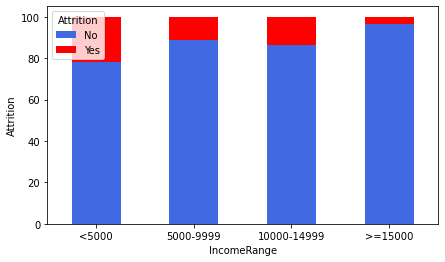

In [28]:
#Visualise the data in a barchart
pal = ["royalblue", "red"]
ax= pd.crosstab(data['IncomeRange'], data['Attrition']).apply(lambda r: r/r.sum()*100, axis=1)
ax.plot.bar(figsize=(7,4),stacked=True, rot=0,color=pal)
display(ax)

plt.xlabel('IncomeRange')
plt.ylabel('Attrition')
plt.xticks(ticks = np.arange(4), labels = ['<5000','5000-9999','10000-14999','>=15000'])
plt.show()

#### Conclution: 
Higher the MonthlyIncome, lower Attrition Rate at 3.76%.
Lower the MonthlyIncome, higher attrition rate at 20.39%.

### 1.4 How does Age affecting Employee Attrition? 

In [29]:
#Unique data in Age Column, and sort from youngest to oldest. 
a = data['Age'].unique()
np.sort(a)

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

In [30]:
#Define the age groups so we have 5 main age groups to looked at. 
def create_age_class(x):
    if x < 20:
        age_class = 1
    elif x >= 20 and x < 30:
        age_class = 2
    elif x >= 30 and x < 40:
        age_class = 3
    elif x >= 40 and x < 50:
        age_class = 4
    else:
        age_class = 5
    return age_class
data['AgeRange'] = data['Age'].apply(create_age_class)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,...,PercentSalaryHike,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,is_attrited,Years_Working,IncomeRange,AgeRange
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,94,...,11,1,1,6,4,0,1,1,2,4
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,61,...,23,4,3,10,7,1,0,2,2,4
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,92,...,15,2,3,0,0,0,1,1,1,3
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,56,...,11,3,3,8,7,3,0,2,1,3
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,40,...,12,4,3,2,2,2,0,1,1,2


In [31]:
#checking the AgeRange conlumn having the same attrition counts. 
new_data = data[['AgeRange','Attrition']]
new_data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [32]:
#Further split the data. We can see very clearly how many people left the company and how many stayed under each AgeRange
result_df = pd.crosstab(data['AgeRange'], data['Attrition'])
result_df["age_range"] = ['<20','20-29','30-39','40-49','>50']
result_df

Attrition,No,Yes,age_range
AgeRange,,,
1,7,10,<20
2,228,81,20-29
3,533,89,30-39
4,315,34,40-49
5,150,23,>50


In [33]:
#Drop Age < 20, they are usually the interns in the company.
drp_idx = data.loc[data['Age'] <= 20,:].index
data.drop(drp_idx, axis = 0, inplace = True)

Attrition,No,Yes,Range
AgeRange,,,
2,74.832215,25.167785,20-29
3,85.691318,14.308682,30-39
4,90.257880,9.742120,40-49
5,86.705202,13.294798,>50


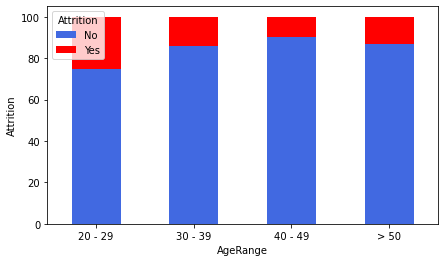

In [34]:
#visualise the data
pal = ["royalblue", "red"]
ax= pd.crosstab(data['AgeRange'], data['Attrition']).apply(lambda r: r/r.sum()*100, axis=1)
ax["Range"] = ['20-29','30-39','40-49','>50']
ax.plot.bar(figsize=(7,4),stacked=True, rot=0,color=pal)
display(ax)

plt.xlabel('AgeRange')
plt.ylabel('Attrition')
plt.xticks(ticks = np.arange(4), labels = ['20 - 29','30 - 39','40 - 49','> 50'])
plt.show()

#### Conclution: Age range 20-29 year old has the highest attrition rate.  As an employee grow older, less likely for them to leave the organisation. At age range of 40-49 attrition rate is 9%, Attrition rate increase when age range is > 50, it goes up might be due to retirement. 
The younger the employee, the likely they will leave the organisation. (New opportunity, self-development etc.)

The older the employee, less likely they will leave the organisation. (Stability)

# 2. Instead of checking how one variable affecting the attrition, let's take a look at how two variables are affecting the attrition

## BusinessTravel and MaritalStatus affecting attrition 

In [35]:
#Find out how frequently the business travel afffecting the attrition. 
b = data['BusinessTravel'].unique()
b

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [36]:
#Take a look at the first 5 row of the data, 'Business_Travel'column is created based on BusinessTravel data
def businesssort(x):
    if x == 'Travel_Rarely':
        return 0
    elif x == "Travel_Frequently":
        return 1
    else:
        return 2

data['Business_Travel'] = data['BusinessTravel'].apply(businesssort)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,...,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,is_attrited,Years_Working,IncomeRange,AgeRange,Business_Travel
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,94,...,1,1,6,4,0,1,1,2,4,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,61,...,4,3,10,7,1,0,2,2,4,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,92,...,2,3,0,0,0,1,1,1,3,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,56,...,3,3,8,7,3,0,2,1,3,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,40,...,4,3,2,2,2,0,1,1,2,0


Attrition,No,Yes
BusinessTravel,,
Non-Travel,93.103448,6.896552
Travel_Frequently,76.470588,23.529412
Travel_Rarely,85.658537,14.341463


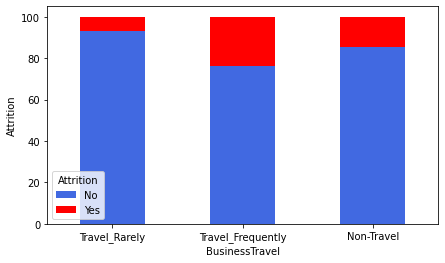

In [37]:
#Visualise the date
pal = ["royalblue", "red"]
ax= pd.crosstab(data['BusinessTravel'], data['Attrition']).apply(lambda r: r/r.sum()*100, axis=1)
ax.plot.bar(figsize=(7,4),stacked=True, rot=0,color=pal)
display(ax)

plt.xlabel('BusinessTravel')
plt.ylabel('Attrition')
plt.xticks(ticks = np.arange(3), labels = ['Travel_Rarely','Travel_Frequently','Non-Travel'])
plt.show()

### First Obervation with 'BusinessTravel'
Travel_Frequently has the highest attrition rate of 23.50% whereas lowest attrition rate when employee are not required to travel with a 6.90%. 

In [38]:
#Check if Married or single has highest attrition related to business travel. 
data.groupby(by=['MaritalStatus','BusinessTravel'])[['is_attrited']].mean()
#                    select columns to groupby       select column to aggregate

is_attrited
MaritalStatus BusinessTravel                
Divorced      Non-Travel            0.022727
              Travel_Frequently     0.206349
              Travel_Rarely         0.086364
Married       Non-Travel            0.050847
              Travel_Frequently     0.161017
              Travel_Rarely         0.125000
Single        Non-Travel            0.142857
              Travel_Frequently     0.351648
              Travel_Rarely         0.213592

#### Conclution (Two variables - MaritalStatus & BusinessTravel) :

When MaritalStatus is also one of the inclusive factor, we can see that people who are single are more likely to attrited when they have to travel frequently for work (mean=0.39) while Married are less likely to leave even if the job requires them to travel frequently (mean=0.16).

## MonthlyIncome and YearsInCurrentRole affecting attrition 

In [39]:
#Take a look at how monthly income and Years working the same role affecting the attrition. 
data.groupby(by=['IncomeRange','Years_Working'])[['is_attrited']].mean()
#                              select columns to groupby       select column to aggregate

is_attrited
IncomeRange Years_Working             
1           1                 0.224913
            2                 0.125984
            3                 0.066667
            4                 0.000000
2           1                 0.127119
            2                 0.102703
            3                 0.000000
            4                 0.000000
3           1                 0.134615
            2                 0.164384
            3                 0.050000
            4                 0.000000
4           1                 0.018519
            2                 0.016949
            3                 0.250000
            4                 0.000000

In [40]:
comparison = data.groupby(by=['IncomeRange','Years_Working'])[['is_attrited']].mean()

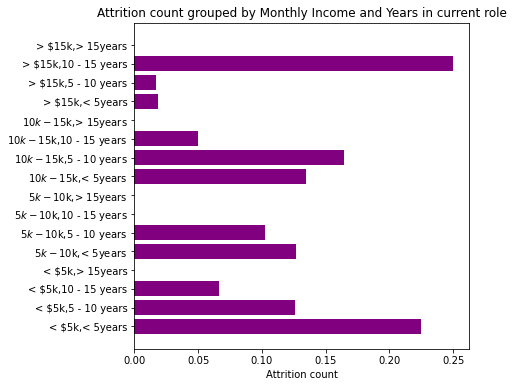

In [41]:
#Visualise the data
incomename = ['< $5k','$5k - $10k','$10k - $15k','> $15k']
yearsname = ['< 5years','5 - 10 years','10 - 15 years','> 15years']

labels = []
for i in range(4):
    i = incomename[i]
    for y in range(4):
        y = yearsname[y]
        labels.append(f'{i},{y}')


plt.figure(figsize = (6,6))
plt.barh(y = np.arange(16), width = comparison['is_attrited'], color = 'purple')

plt.title('Attrition count grouped by Monthly Income and Years in current role')
plt.xlabel('Attrition count')
plt.yticks(ticks = np.arange(16), labels = labels);

#### Conclution (Two variables - MonthlyIncome & YearsInCurrentRole) :
Employee who has high monthly income and worked more than 5 (or 10 years) at the same position in the company are less likely to leave the organisation. 

Employerr who has low monthly income more likely to leave no matter how long they worked in the company with the same position. 

<AxesSubplot:>

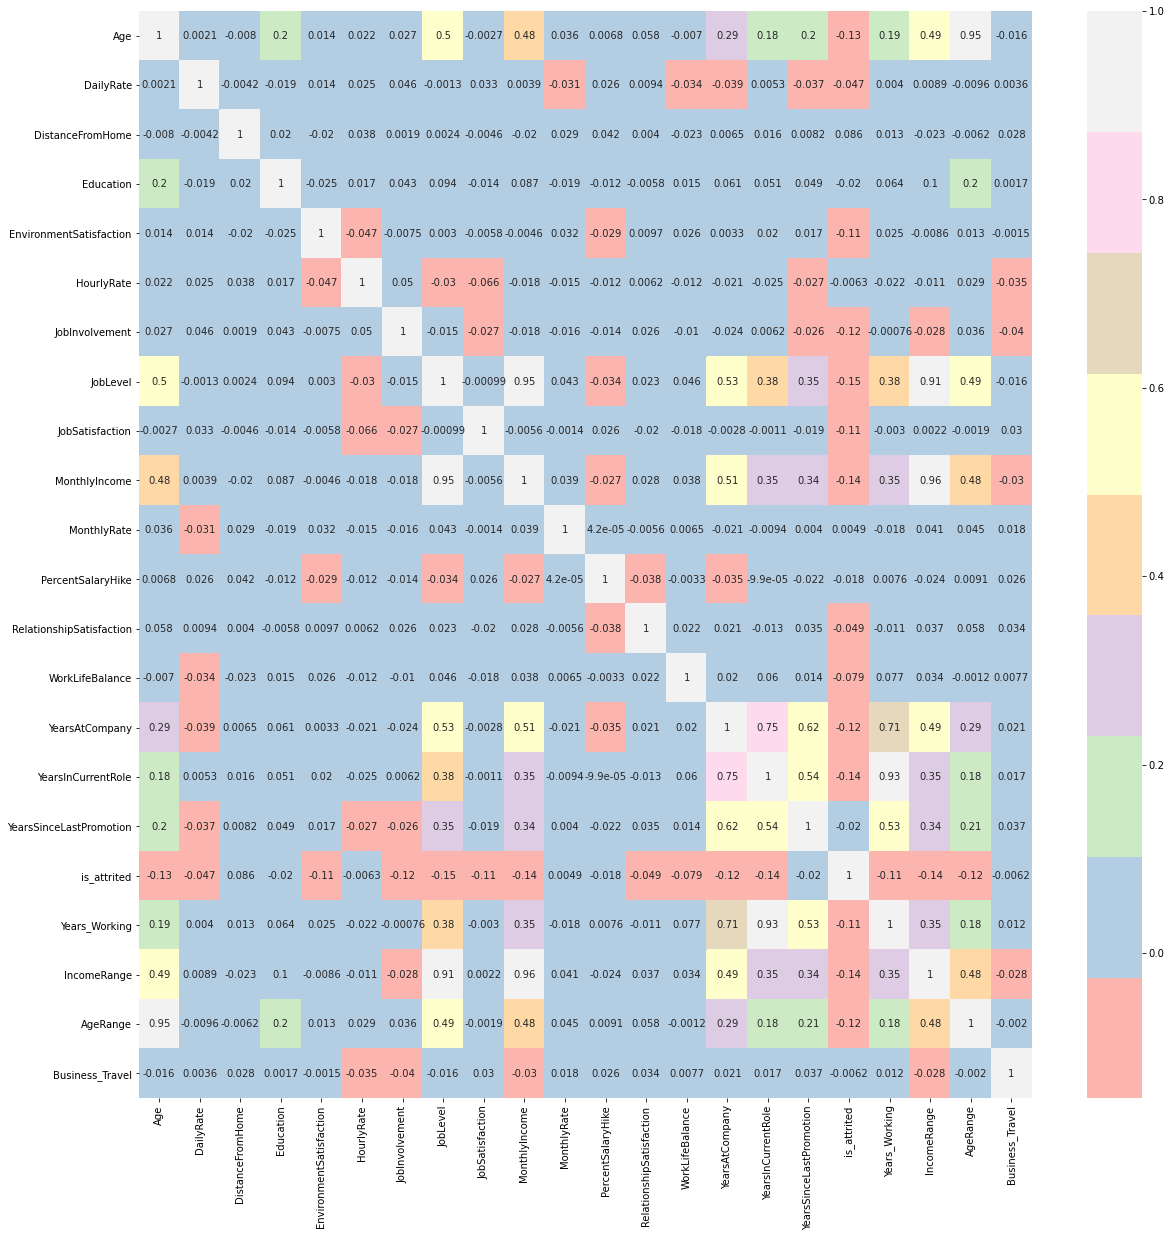

In [42]:
#FOR FUN & VISUALISE THE DATA AGAIN

corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap="Pastel1", annot=True)